<a href="https://colab.research.google.com/github/LithiraHettiarachchi/vehicle_classifier/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
#Limiting the GPU allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
#Getting into data folder
data_dir = '/content/drive/MyDrive/Image_Classification/data/'

In [6]:
os.listdir(os.path.join(data_dir, ''))

['bike', 'car']

In [7]:
image_exts = ['jpeg', 'jpg', 'png']

In [8]:
#Getting imagepaths
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print("Image does not exist")
          os.remove(image_path)
      except Exception as e:
        print("Not found")



In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
import numpy as np

In [11]:
#Building a data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 112 files belonging to 2 classes.


In [12]:
#Access data from data pipeline
data_itr = data.as_numpy_iterator()

In [13]:
#Getting loop though pipeline
#This has the data of images and labels
batch = data_itr.next()
batch[0].shape
#Calss 0 = Bike and class 1 = Car

(32, 256, 256, 3)

In [14]:
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

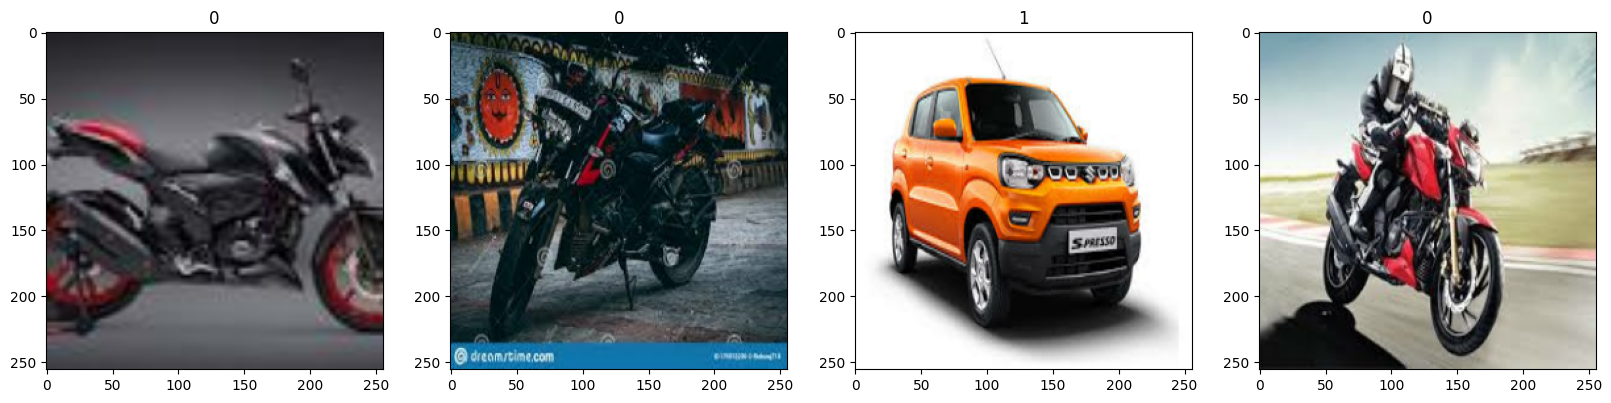

In [15]:
#Finding out the two classes (Car or Bike)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [16]:
#Conveting images between 0 and 1 insted of 255

In [17]:
#Scaling data 
data = data.map(lambda x,y: (x/255, y))

In [18]:
scaled_itr = data.as_numpy_iterator()

In [19]:
batch = scaled_itr.next()

In [20]:
batch[0].max()
#After scaling data it doesn't support int

1.0

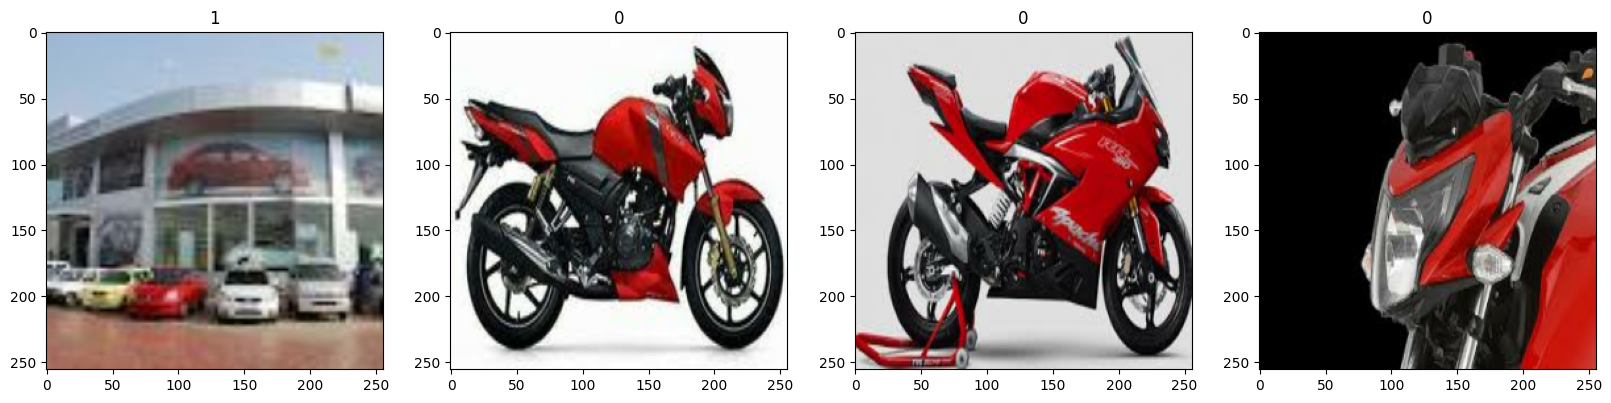

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [22]:
#Splitting the data

In [23]:
len(data)

4

In [24]:
train_size = int(len(data)*.7)
valid_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [25]:
#Getting data to feed the model
train = data.take(train_size)
validate = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size).take(test_size)

In [26]:
#The Deep Learning Model
from tensorflow.keras.models import Sequential #To done things quick and easy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #For cnn

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3))) #Inseting images with 256 with 3 chnannels
model.add(MaxPooling2D()) #Getting max value after the activation function

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) #Layer with 256 neurons
model.add(Dense(1, activation='sigmoid')) #Finl layer with single neurone
#This line is predicting whether the image is bike or car

In [29]:
#Getting optimizer and losses and the accuracy

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [52]:
logdir = '/content/drive/MyDrive/Image_Classification/logs'

In [53]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=validate, callbacks=[tensor_callback])

Epoch 1/20
2/2 [==============================] - 1s 708ms/step - loss: 1.5701e-04 - accuracy: 1.0000 - val_loss: 2.3005e-04 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 1s 291ms/step - loss: 1.4908e-04 - accuracy: 1.0000 - val_loss: 1.6511e-04 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 264ms/step - loss: 1.1572e-04 - accuracy: 1.0000 - val_loss: 1.8107e-04 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 1s 367ms/step - loss: 1.2712e-04 - accuracy: 1.0000 - val_loss: 1.6286e-04 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 1s 366ms/step - loss: 1.2430e-04 - accuracy: 1.0000 - val_loss: 1.5612e-04 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 1s 366ms/step - loss: 1.2073e-04 - accuracy: 1.0000 - val_loss: 1.2509e-04 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 267ms/step - loss: 1.4198e-04 - accuracy: 1.0000 - val_loss

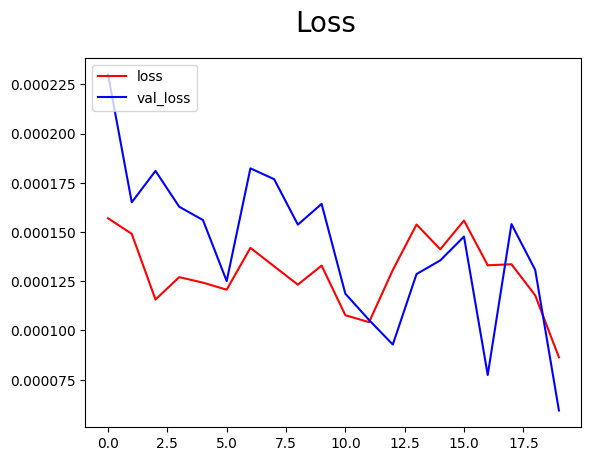

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#The model is underfitting. Needs to apply more data.

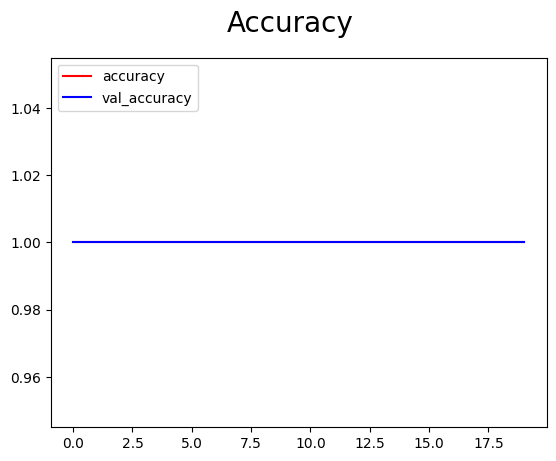

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
pre = Precision()
rec = Recall()
biacc = BinaryAccuracy()

In [59]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  rec.update_state(y, yhat)
  biacc.update_state(y, yhat)

1/1 [==============================] - 0s 26ms/step


In [60]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracu:{biacc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracu:1.0


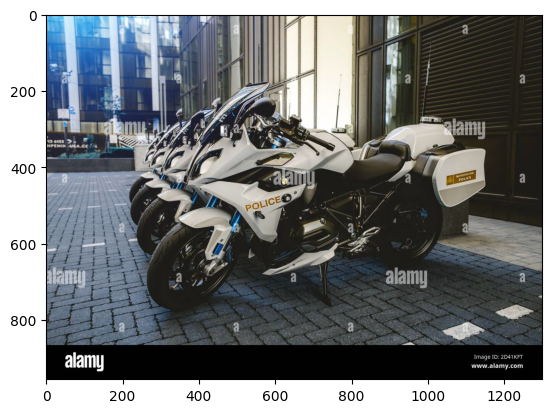

In [67]:
#Testing the model
img = cv2.imread('/content/drive/MyDrive/Image_Classification/Bike (174).jpg')
plt.imshow(img)
plt.show()

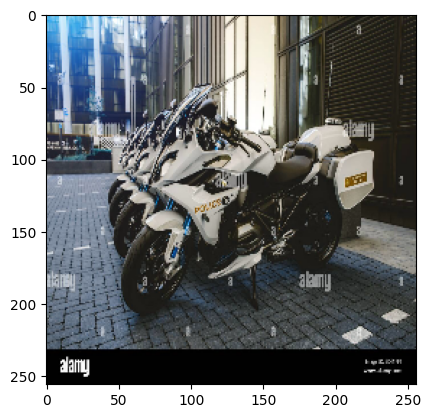

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
np.expand_dims(resize, 0)

array([[[[114.76434 , 204.72528 , 245.56903 ],
         [ 82.19531 , 183.13281 , 231.83594 ],
         [ 56.859375, 176.92969 , 238.46735 ],
         ...,
         [ 36.970154,  30.970154,  25.235779],
         [ 66.38727 ,  60.387268,  54.652893],
         [ 61.040344,  57.34375 ,  34.61194 ]],

        [[113.27344 , 202.13678 , 246.21478 ],
         [ 85.67151 , 184.60901 , 233.30023 ],
         [ 63.667664, 180.39062 , 240.40625 ],
         ...,
         [ 43.389343,  39.59247 ,  28.592468],
         [ 44.598206,  40.80133 ,  29.80133 ],
         [ 36.445312,  34.503845,  26.906128]],

        [[110.515625, 197.67328 , 246.96594 ],
         [ 84.68329 , 181.17249 , 230.4964  ],
         [ 69.421875, 179.71875 , 236.77344 ],
         ...,
         [ 36.164062,  36.000793,  24.327332],
         [ 33.019226,  32.28125 ,  21.757202],
         [ 30.362976,  30.389221,  30.232971]],

        ...,

        [[  1.      ,   1.      ,   1.      ],
         [  1.      ,   1.      ,   1.      ]

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [71]:
yhat

array([[0.00021304]], dtype=float32)